In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


## read data

In [2]:
df=pd.read_excel('空气质量.xlsx')

In [3]:
df

,城 市,City,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳浓度,臭氧,PM2.5,空气质量的天数,沙暴指数
0,北 京,Beijing,6,42,78,1.7,192,51,227,1
1,天 津,Tianjin,12,47,82,1.9,201,52,207,1
2,石家庄,Shijiazhuang,23,50,131,2.6,211,72,151,1
3,唐 山,Tangshan,34,56,110,3.3,197,60,202,0
4,秦皇岛,Qinhuangdao,21,45,77,2.5,164,38,285,0
...,...,...,...,...,...,...,...,...,...,...
108,西 宁,Xining,20,39,91,2.8,138,46,282,3
109,银 川,Yinchuan,27,37,87,2.1,166,38,249,3
110,石嘴山,Shizuishan,41,32,89,1.7,157,39,250,3
111,乌鲁木齐,Urumqi,11,45,98,3.0,134,54,255,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   城 市      113 non-null    object 
 1   City     113 non-null    object 
 2   二氧化硫     113 non-null    int64  
 3   二氧化氮     113 non-null    int64  
 4   可吸入颗粒物   113 non-null    int64  
 5   一氧化碳浓度   113 non-null    float64
 6   臭氧       113 non-null    int64  
 7   PM2.5    113 non-null    int64  
 8   空气质量的天数  113 non-null    int64  
 9   沙暴指数     113 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 9.0+ KB


In [5]:
df

,城 市,City,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳浓度,臭氧,PM2.5,空气质量的天数,沙暴指数
0,北 京,Beijing,6,42,78,1.7,192,51,227,1
1,天 津,Tianjin,12,47,82,1.9,201,52,207,1
2,石家庄,Shijiazhuang,23,50,131,2.6,211,72,151,1
3,唐 山,Tangshan,34,56,110,3.3,197,60,202,0
4,秦皇岛,Qinhuangdao,21,45,77,2.5,164,38,285,0
...,...,...,...,...,...,...,...,...,...,...
108,西 宁,Xining,20,39,91,2.8,138,46,282,3
109,银 川,Yinchuan,27,37,87,2.1,166,38,249,3
110,石嘴山,Shizuishan,41,32,89,1.7,157,39,250,3
111,乌鲁木齐,Urumqi,11,45,98,3.0,134,54,255,2


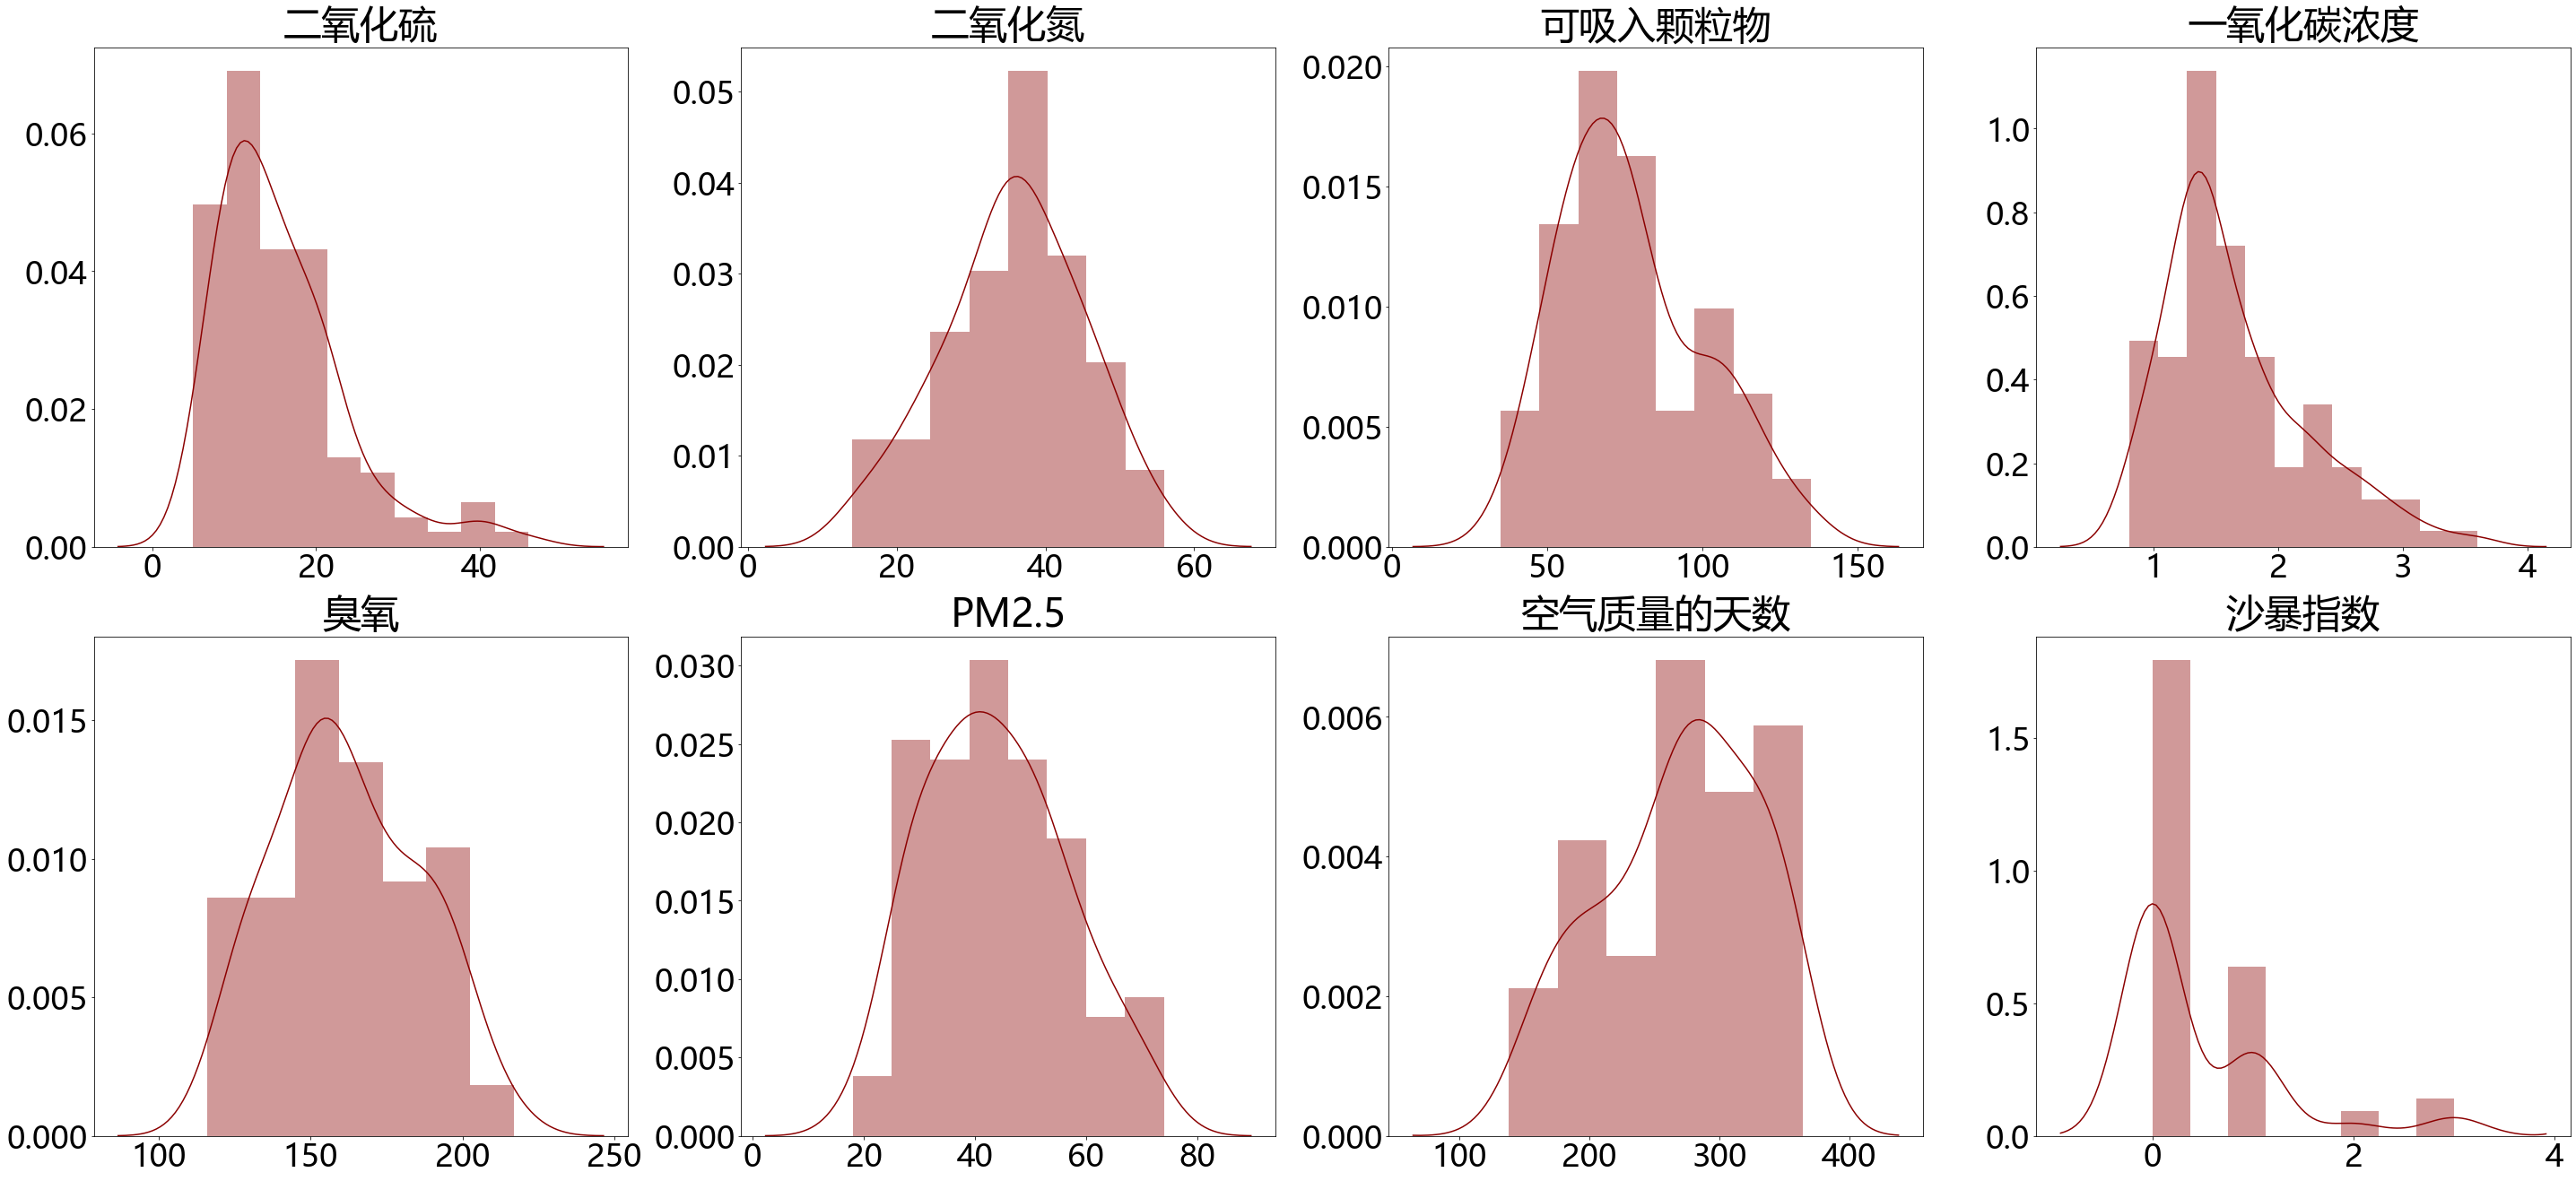

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (40, 20))
for ax, column in zip(axes.flatten(), df.iloc[:,2:].columns):
    sns.distplot(df[column], ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

## topsis

In [7]:
'''本单元格代码来自于https://blog.csdn.net/weixin_37605340/article/details/
89511946?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163144030716780271580627%2522%252C%2522scm%2522%253A%252220140713.130102334.
pc%255Fall.%2522%257D&request_id=163144030716780271580627&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v29_ecpm-2-89511946.pc_search_result_cache&utm_term=%E7%86%B5%E6%9D%83%E6%B3%95python&spm=1018.2226.3001.4187'''

import pandas as pd
import numpy as np
import math
from numpy import array
 
#定义熵权法函数
def cal_weight(x):
    '''熵权法计算变量的权重'''
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
 
    lnf = [[None] * cols for i in range(rows)]
 
    # 矩阵计算--

    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
 
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    
    w = pd.DataFrame(w)
    return w

In [8]:
'''本单元格代码来自于https://github.com/Glitchfix/TOPSIS-Python
贡献TOPSIS源代码'''

import numpy as np
import warnings


class Topsis():
    evaluation_matrix = np.array([])  # Matrix
    weighted_normalized = np.array([])  # Weight matrix
    normalized_decision = np.array([])  # Normalisation matrix
    M = 0  # Number of rows
    N = 0  # Number of columns

    '''
	Create an evaluation matrix consisting of m alternatives and n criteria,
	with the intersection of each alternative and criteria given as {\displaystyle x_{ij}}x_{ij},
	we therefore have a matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}}.
	'''

    def __init__(self, evaluation_matrix, weight_matrix, criteria):
        # M×N matrix
        self.evaluation_matrix = np.array(evaluation_matrix, dtype="float")

        # M alternatives (options)
        self.row_size = len(self.evaluation_matrix)

        # N attributes/criteria
        self.column_size = len(self.evaluation_matrix[0])

        # N size weight matrix
        self.weight_matrix = np.array(weight_matrix, dtype="float")
        self.weight_matrix = self.weight_matrix/sum(self.weight_matrix)
        self.criteria = np.array(criteria, dtype="float")

    '''
	# Step 2
	The matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}} is then normalised to form the matrix
	'''

    def step_2(self):
        # normalized scores
        self.normalized_decision = np.copy(self.evaluation_matrix)
        sqrd_sum = np.zeros(self.column_size)
        for i in range(self.row_size):
            for j in range(self.column_size):
                sqrd_sum[j] += self.evaluation_matrix[i, j]**2
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.normalized_decision[i,
                                         j] = self.evaluation_matrix[i, j]/(sqrd_sum[j]**0.5)

    '''
	# Step 3
	Calculate the weighted normalised decision matrix
	'''

    def step_3(self):
        from pdb import set_trace
        self.weighted_normalized = np.copy(self.normalized_decision)
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.weighted_normalized[i, j] *= self.weight_matrix[j]

    '''
	# Step 4
	Determine the worst alternative {\displaystyle (A_{w})}(A_{w}) and the best alternative {\displaystyle (A_{b})}(A_{b}):
	'''

    def step_4(self):
        self.worst_alternatives = np.zeros(self.column_size)
        self.best_alternatives = np.zeros(self.column_size)
        for i in range(self.column_size):
            if self.criteria[i]:
                self.worst_alternatives[i] = min(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = max(self.weighted_normalized[:, i])
            else:
                self.worst_alternatives[i] = max(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = min(self.weighted_normalized[:, i])

    '''
	# Step 5
	Calculate the L2-distance between the target alternative {\displaystyle i}i and the worst condition {\displaystyle A_{w}}A_{w}
	{\displaystyle d_{iw}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{wj})^{2}}},\quad i=1,2,\ldots ,m,}
	and the distance between the alternative {\displaystyle i}i and the best condition {\displaystyle A_{b}}A_b
	{\displaystyle d_{ib}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{bj})^{2}}},\quad i=1,2,\ldots ,m}
	where {\displaystyle d_{iw}}d_{{iw}} and {\displaystyle d_{ib}}d_{{ib}} are L2-norm distances 
	from the target alternative {\displaystyle i}i to the worst and best conditions, respectively.
	'''

    def step_5(self):
        self.worst_distance = np.zeros(self.row_size)
        self.best_distance = np.zeros(self.row_size)

        self.worst_distance_mat = np.copy(self.weighted_normalized)
        self.best_distance_mat = np.copy(self.weighted_normalized)

        for i in range(self.row_size):
            for j in range(self.column_size):
                self.worst_distance_mat[i][j] = (self.weighted_normalized[i][j]-self.worst_alternatives[j])**2
                self.best_distance_mat[i][j] = (self.weighted_normalized[i][j]-self.best_alternatives[j])**2
                
                self.worst_distance[i] += self.worst_distance_mat[i][j]
                self.best_distance[i] += self.best_distance_mat[i][j]

        for i in range(self.row_size):
            self.worst_distance[i] = self.worst_distance[i]**0.5
            self.best_distance[i] = self.best_distance[i]**0.5

    '''
	# Step 6
	Calculate the similarity
	'''

    def step_6(self):
        np.seterr(all='ignore')
        self.worst_similarity = np.zeros(self.row_size)
        self.best_similarity = np.zeros(self.row_size)

        for i in range(self.row_size):
            # calculate the similarity to the worst condition
            self.worst_similarity[i] = self.worst_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])

            # calculate the similarity to the best condition
            self.best_similarity[i] = self.best_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])
    
    def ranking(self, data):
        return [i+1 for i in data.argsort()]

    def rank_to_worst_similarity(self):
        # return rankdata(self.worst_similarity, method="min").astype(int)
        return self.ranking(self.worst_similarity)

    def rank_to_best_similarity(self):
        # return rankdata(self.best_similarity, method='min').astype(int)
        return self.ranking(self.best_similarity)

    def calc(self):
        print("Step 1\n", self.evaluation_matrix, end="\n\n")
        self.step_2()
        print("Step 2\n", self.normalized_decision, end="\n\n")
        self.step_3()
        print("Step 3\n", self.weighted_normalized, end="\n\n")
        self.step_4()
        print("Step 4\n", self.worst_alternatives,
              self.best_alternatives, end="\n\n")
        self.step_5()
        print("Step 5\n", self.worst_distance, self.best_distance, end="\n\n")
        self.step_6()
        print("Step 6\n", self.worst_similarity,
              self.best_similarity, end="\n\n")


In [9]:
a=pd.DataFrame(df.iloc[:,2:])
w = cal_weight(a)# 调用函数计算权重
w.index = a.columns
w.columns = ['weight']

In [10]:
w['weight'].sort_values(ascending=False)

沙暴指数       0.524022
二氧化硫       0.102519
一氧化碳浓度     0.094491
可吸入颗粒物     0.063286
臭氧         0.062594
PM2.5      0.055040
空气质量的天数    0.050928
二氧化氮       0.047121
Name: weight, dtype: float64

In [11]:
matrix=a
weights=np.array(w)
criterias=[False,False,False,False,True,False,True,False]#确定各个变量的正向行和负向性，True为正向性变量，False为负向性变量
t = Topsis(matrix, weights, criterias)
t.calc()
a=t.rank_to_best_similarity()#按照与最优解的距离来排名
print(a)

Step 1
 [[  6.   42.   78.    1.7 192.   51.  227.    1. ]
 [ 12.   47.   82.    1.9 201.   52.  207.    1. ]
 [ 23.   50.  131.    2.6 211.   72.  151.    1. ]
 [ 34.   56.  110.    3.3 197.   60.  202.    0. ]
 [ 21.   45.   77.    2.5 164.   38.  285.    0. ]
 [ 22.   43.  133.    2.8 201.   69.  161.    1. ]
 [ 21.   47.  114.    2.4 210.   67.  159.    1. ]
 [ 29.   52.  135.    1.9 191.   59.  170.    1. ]
 [ 31.   29.   82.    3.1 153.   36.  288.    1. ]
 [ 32.   45.  108.    2.2 184.   59.  203.    1. ]
 [ 22.   31.   98.    2.4 189.   54.  213.    1. ]
 [ 46.   40.  117.    3.6 217.   69.  138.    1. ]
 [ 20.   41.   86.    2.2 150.   36.  272.    3. ]
 [ 24.   39.   84.    2.3 156.   39.  268.    3. ]
 [ 20.   27.   69.    1.5 127.   30.  331.    2. ]
 [ 26.   39.   72.    1.8 163.   41.  282.    0. ]
 [ 12.   27.   55.    1.3 157.   30.  317.    0. ]
 [ 22.   34.   76.    2.1 158.   41.  299.    0. ]
 [ 21.   32.   72.    1.6 164.   43.  278.    0. ]
 [ 21.   31.   65.    2

In [12]:
d=pd.DataFrame({'score':t.worst_similarity},index=df['City'])
d['score'].sort_values(ascending=False)#按得分排名

City
Fuzhou        0.979969
Zhuhai        0.979306
Zhanjiang     0.978826
Haikou        0.978081
Shenzhen      0.977125
                ...   
Xining        0.090101
Baotou        0.086618
Yinchuan      0.082628
Yan'an        0.079349
Shizuishan    0.069059
Name: score, Length: 113, dtype: float64

In [13]:
d.to_excel("City_score.xlsx", encoding="utf_8")